In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets list

ref                                                               title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                             14473  2025-03-19 03:51:40.270000          13974        245  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                         467020  2025-03-13 03:12:30.423000           5747         93  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                              20314  2025-02-18 06:50:24.370000          18987        310  1.0              
baddu01/ipl-202

In [4]:
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification -p ./kaggle

Dataset URL: https://www.kaggle.com/datasets/surajghuwalewala/ham1000-segmentation-and-classification
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)


In [5]:
!unzip ./kaggle/ham1000-segmentation-and-classification.zip -d ./kaggle

Streaming output truncated to the last 5000 lines.
  inflating: ./kaggle/masks/ISIC_0029321_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029322_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029323_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029324_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029325_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029326_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029327_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029328_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029329_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029330_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029331_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029332_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029333_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029334_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029335_segmentation.png  
  inflating: ./kaggle/masks/ISIC_0029336_segmenta

In [6]:
!ls -lh ./kaggle


total 2.6G
-rw-r--r-- 1 root root 411K May 27  2021 GroundTruth.csv
-rw-r--r-- 1 root root 2.6G May 27  2021 ham1000-segmentation-and-classification.zip
drwxr-xr-x 2 root root 340K Mar 30 04:19 images
drwxr-xr-x 2 root root 552K Mar 30 04:19 masks


In [7]:
!ls -lh ./kaggle/images


Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root 250K May 27  2021 ISIC_0029322.jpg
-rw-r--r-- 1 root root 229K May 27  2021 ISIC_0029323.jpg
-rw-r--r-- 1 root root 260K May 27  2021 ISIC_0029324.jpg
-rw-r--r-- 1 root root 256K May 27  2021 ISIC_0029325.jpg
-rw-r--r-- 1 root root 265K May 27  2021 ISIC_0029326.jpg
-rw-r--r-- 1 root root 260K May 27  2021 ISIC_0029327.jpg
-rw-r--r-- 1 root root 326K May 27  2021 ISIC_0029328.jpg
-rw-r--r-- 1 root root 325K May 27  2021 ISIC_0029329.jpg
-rw-r--r-- 1 root root 262K May 27  2021 ISIC_0029330.jpg
-rw-r--r-- 1 root root 221K May 27  2021 ISIC_0029331.jpg
-rw-r--r-- 1 root root 178K May 27  2021 ISIC_0029332.jpg
-rw-r--r-- 1 root root 258K May 27  2021 ISIC_0029333.jpg
-rw-r--r-- 1 root root 269K May 27  2021 ISIC_0029334.jpg
-rw-r--r-- 1 root root 327K May 27  2021 ISIC_0029335.jpg
-rw-r--r-- 1 root root 334K May 27  2021 ISIC_0029336.jpg
-rw-r--r-- 1 root root 231K May 27  2021 ISIC_0029337.jpg
-rw-r--r-- 1 root roo

In [8]:
import pandas as pd

df = pd.read_csv("./kaggle/GroundTruth.csv")
print(df.head())  # Print first 5 rows
print(df.columns)  # Print all column names
df["cancer"] = df[["MEL", "BCC", "AKIEC"]].max(axis=1)  # 1 if any cancerous class is present, else 0


          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


In [9]:
import os
import shutil
import pandas as pd

# Load CSV
df = pd.read_csv("./kaggle/GroundTruth.csv")

# Create 'cancer' column (1 if MEL, BCC, or AKIEC is present, else 0)
df["cancer"] = df[["MEL", "BCC", "AKIEC"]].max(axis=1)

# Define paths
source_dir = "./kaggle/images/"
target_dir = "./kaggle/organized_images/"

os.makedirs(target_dir, exist_ok=True)
os.makedirs(os.path.join(target_dir, "cancer"), exist_ok=True)
os.makedirs(os.path.join(target_dir, "no_cancer"), exist_ok=True)

# Move files
for _, row in df.iterrows():
    filename = row["image"]  # Use 'image' column instead of 'filename'
    label = "cancer" if row["cancer"] == 1 else "no_cancer"

    src_path = os.path.join(source_dir, filename + ".jpg")  # Ensure file extension is included
    dest_path = os.path.join(target_dir, label, filename + ".jpg")

    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)

print("Dataset organized successfully!")



Dataset organized successfully!


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "./kaggle/organized_images/"

# Image preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values
    validation_split=0.2  # 80% Train, 20% Validation
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8013 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


Found 8013 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


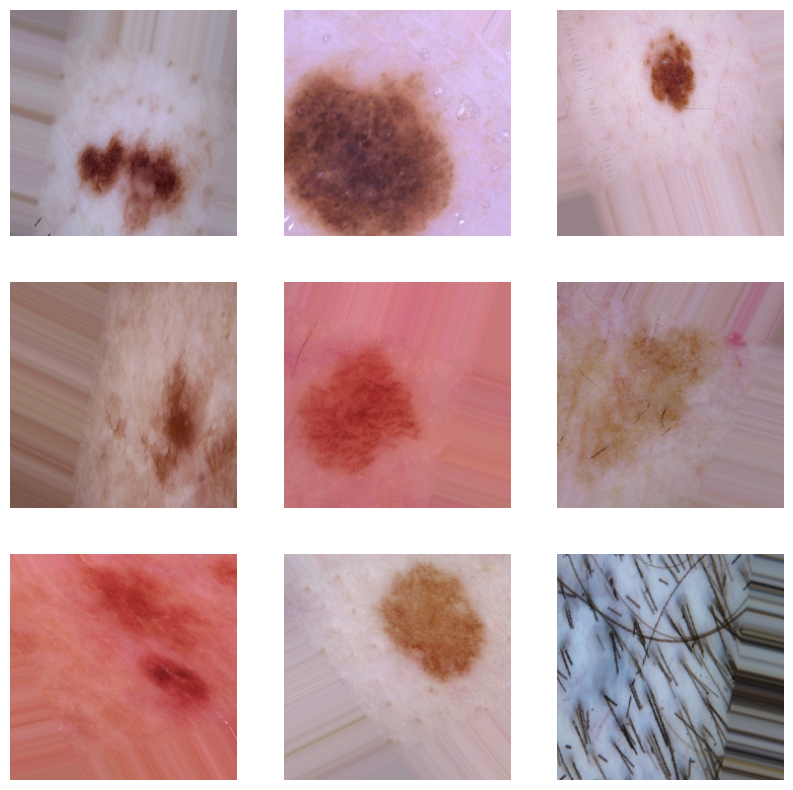

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "./kaggle/organized_images/"

# Augment the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # More rotation
    width_shift_range=0.3,  # More width shift
    height_shift_range=0.3,  # More height shift
    shear_range=0.3,
    zoom_range=0.3,  # Increased zoom
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% Train, 20% Validation
)

# Validation data should not be augmented
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data with augmentation
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True  # Ensure images are shuffled
)

# Load validation data without augmentation
val_data = val_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Display sample augmented images
def visualize_augmented_images(data_generator):
    images, labels = next(data_generator)  # Get a batch of images
    plt.figure(figsize=(10, 10))

    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

# Check if augmentation is working
visualize_augmented_images(train_data)


In [12]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load Pre-trained VGG19 Model (without top layers)
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers (so they don’t get updated)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enable mixed precision for faster training
tf.keras.mixed_precision.set_global_policy("mixed_float16")

# Define paths
train_dir = "./kaggle/organized_images/"

# Use efficient data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Smaller size speeds up training
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load Pre-trained VGG19 Model (without top layers)
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (removing unsupported arguments)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Reduce if still slow
)

# Save model
model.save("skin_cancer_vgg19.h5")

print("Model training complete!")



Found 8013 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 121s 443ms/step - accuracy: 0.7929 - loss: 0.4789 - val_accuracy: 0.8222 - val_loss: 0.3908
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 108s 432ms/step - accuracy: 0.8112 - loss: 0.4152 - val_accuracy: 0.8212 - val_loss: 0.3700
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 103s 411ms/step - accuracy: 0.8114 - loss: 0.4037 - val_accuracy: 0.8237 - val_loss: 0.3665
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 407ms/step - accuracy: 0.8040 - loss: 0.4014 - val_accuracy: 0.8322 - val_loss: 0.3633
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 107s 427ms/step - accuracy: 0.8130 - loss: 0.3921 - val_accuracy: 0.8252 - val_loss: 0.3522
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 110s 440ms/step - accuracy: 0.8186 - loss: 0.3850 - val_accuracy: 0.8292 - val_loss: 0.3495
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.8180 - loss: 0.3792 - val_accuracy: 0.8317 - val_loss: 0.3503
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 110s 438ms/step - accuracy: 0.8246 -

Model training complete!


In [26]:
import os

test_image_path = "./kaggle/test_image.jpg"

if os.path.exists(test_image_path):
    print("✅ File exists:", test_image_path)
else:
    print("❌ File not found. Check the directory and filename.")


❌ File not found. Check the directory and filename.


In [27]:
import os

directory = "./kaggle/"

if os.path.exists(directory):
    print("📂 Files in", directory, ":", os.listdir(directory))
else:
    print("❌ Directory not found:", directory)


📂 Files in ./kaggle/ : ['GroundTruth.csv', 'images', 'masks', 'organized_images', 'ham1000-segmentation-and-classification.zip']


In [28]:
import os

folders = ["images", "masks", "organized_images"]
directory = "./kaggle/"

for folder in folders:
    folder_path = os.path.join(directory, folder)
    if os.path.exists(folder_path):
        print(f"📂 Files in {folder_path}:", os.listdir(folder_path))
    else:
        print(f"❌ Directory not found: {folder_path}")


📂 Files in ./kaggle/images: ['LICENSE.txt', 'ATTRIBUTION.txt']
📂 Files in ./kaggle/masks: ['ISIC_0033861_segmentation.png', 'ISIC_0026020_segmentation.png', 'ISIC_0024917_segmentation.png', 'ISIC_0033079_segmentation.png', 'ISIC_0031630_segmentation.png', 'ISIC_0029705_segmentation.png', 'ISIC_0031005_segmentation.png', 'ISIC_0032370_segmentation.png', 'ISIC_0028303_segmentation.png', 'ISIC_0033761_segmentation.png', 'ISIC_0032459_segmentation.png', 'ISIC_0032644_segmentation.png', 'ISIC_0029237_segmentation.png', 'ISIC_0025721_segmentation.png', 'ISIC_0032826_segmentation.png', 'ISIC_0029255_segmentation.png', 'ISIC_0025210_segmentation.png', 'ISIC_0030016_segmentation.png', 'ISIC_0032520_segmentation.png', 'ISIC_0024572_segmentation.png', 'ISIC_0024800_segmentation.png', 'ISIC_0032591_segmentation.png', 'ISIC_0028893_segmentation.png', 'ISIC_0024581_segmentation.png', 'ISIC_0031473_segmentation.png', 'ISIC_0030214_segmentation.png', 'ISIC_0027959_segmentation.png', 'ISIC_0024926_segm

In [29]:
import shutil

source_path = "./kaggle/images/test_image.jpg"  # Change this to the actual location
destination_path = "./kaggle/test_image.jpg"

if os.path.exists(source_path):
    shutil.move(source_path, destination_path)
    print("✅ Image moved successfully!")
else:
    print("❌ Image not found at", source_path)


❌ Image not found at ./kaggle/images/test_image.jpg


In [32]:
!find / -name "test_image.jpg" 2>/dev/null

In [33]:
import numpy as np
from PIL import Image

img = Image.fromarray(np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8))
img.save("./kaggle/images/test_image.jpg")
print("✅ Test image created successfully!")


✅ Test image created successfully!


In [34]:
test_image_path = "./kaggle/images/test_image.jpg"
print(predict_image(test_image_path, model))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Cancer
